In [58]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import balanced_accuracy_score, classification_report

## Retrieve Data from .CSV file

In [59]:
# Import data
df = pd.read_csv('../Resources/earthquake_data.csv')

display(df.head())

,id,time,place,longitude,latitude,depth,magnitude,felt,cdi,mmi,...,t_axis_plunge,percent_double_couple,scalar_moment,tensor_mpp,tensor_mrp,tensor_mrr,tensor_mrt,tensor_mtp,tensor_mtt,soil_density
0,nc30092964,1995-12-28 18:28:01.230000+00:00,"9 km WNW of Topaz Lake, Nevada",-119.654500,38.714500,-1.011,4.80,NaN,NaN,6.1,...,8.496,0.94,1.749000e+16,1.717000e+16,-2.593000e+15,-2.563000e+14,-1.434000e+15,2.590000e+15,-1.691000e+16,1.25000
1,nc30092581,1995-12-23 05:39:56.650000+00:00,"8 km WNW of Topaz Lake, Nevada",-119.633000,38.730500,-1.081,4.70,NaN,NaN,NaN,...,8.968,0.83,1.175000e+16,1.082000e+16,1.325000e+15,-2.496000e+14,4.455000e+15,1.729000e+15,-1.057000e+16,1.25000
2,nc30092506,1995-12-22 09:00:34.560000+00:00,California-Nevada border region,-119.635000,38.721500,3.659,4.86,NaN,NaN,NaN,...,3.308,0.53,2.435000e+16,2.737000e+16,-2.897000e+15,-1.909000e+16,-4.715000e+15,-1.774000e+15,-8.282000e+15,1.25000
3,nc30091857,1995-12-13 06:25:54.110000+00:00,"9 km ESE of Gilroy, California",-121.470333,36.982167,4.234,3.80,NaN,NaN,NaN,...,15.899,0.81,7.420000e+14,4.317000e+14,2.781000e+14,-4.776000e+13,-3.905000e+13,5.545000e+14,-3.840000e+14,1.89375
4,nc30094697,1995-12-13 05:45:12.760000+00:00,"9 km ESE of Gilroy, California",-121.470000,36.976667,6.204,3.90,NaN,NaN,NaN,...,9.016,0.49,9.521000e+14,3.951000e+14,2.489000e+13,2.802000e+14,1.330000e+14,7.743000e+14,-6.753000e+14,1.89375


## Clean Data

In [60]:
# Check data for completeness and data types
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1428 entries, 0 to 1427
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     1428 non-null   object 
 1   time                   1428 non-null   object 
 2   place                  1428 non-null   object 
 3   longitude              1428 non-null   float64
 4   latitude               1428 non-null   float64
 5   depth                  1428 non-null   float64
 6   magnitude              1428 non-null   float64
 7   felt                   1128 non-null   float64
 8   cdi                    1128 non-null   float64
 9   mmi                    1072 non-null   float64
 10  significance           1428 non-null   int64  
 11  number_stations        1426 non-null   float64
 12  min_station_distance   1413 non-null   float64
 13  nodal_plane_1_dip      1428 non-null   float64
 14  nodal_plane_1_rake     1428 non-null   float64
 15  noda

None

Datatypes are what we need since all of the numerical columns are either floating point or integer numbers.

However, there are quite a few rows with `NaN` values especially in the `mmi` column. Let's determine how much data we would lose if we dropped those rows.

In [61]:
# Calculate percentage of rows with NaN values
df.isnull().sum()/len(df)

id                       0.000000
time                     0.000000
place                    0.000000
longitude                0.000000
latitude                 0.000000
depth                    0.000000
magnitude                0.000000
felt                     0.210084
cdi                      0.210084
mmi                      0.249300
significance             0.000000
number_stations          0.001401
min_station_distance     0.010504
nodal_plane_1_dip        0.000000
nodal_plane_1_rake       0.000000
nodal_plane_1_strike     0.000000
nodal_plane_2_dip        0.000000
nodal_plane_2_rake       0.000000
nodal_plane_2_strike     0.000000
n_axis_azimuth           0.000000
n_axis_length            0.000000
n_axis_plunge            0.000000
p_axis_azimuth           0.000000
p_axis_length            0.000000
p_axis_plunge            0.000000
t_axis_azimuth           0.000000
t_axis_length            0.000000
t_axis_plunge            0.000000
percent_double_couple    0.000000
scalar_moment 

We lose about 25% of the data if we drop rows with `NaN`. We will proceed.

In [62]:
# Drop rows with NaN and reset index
df_cleaned = df.dropna().reset_index(drop=True)
display(df_cleaned.head())

# Check how many records remain
df_cleaned.count()

,id,time,place,longitude,latitude,depth,magnitude,felt,cdi,mmi,...,t_axis_plunge,percent_double_couple,scalar_moment,tensor_mpp,tensor_mrp,tensor_mrr,tensor_mrt,tensor_mtp,tensor_mtt,soil_density
0,nc21044694,1999-08-18 01:06:18.940000+00:00,"0 km S of Bolinas, California",-122.686500,37.907333,7.659,4.60,1545.0,5.8,5.38,...,80.769,0.48,9.756000e+15,-2.216000e+15,-1.915000e+15,7.806000e+15,2.421000e+15,6.588000e+15,-5.590000e+15,1.220000
1,nc21140955,2000-12-27 13:15:11.220000+00:00,"20 km SW of Ferndale, California",-124.460167,40.466000,28.026,4.10,82.0,3.8,2.86,...,32.902,0.96,1.474000e+15,9.714000e+14,-7.529000e+14,1.047000e+14,-7.374000e+14,8.916000e+13,-1.076000e+15,1.856667
2,nc21139833,2000-12-20 23:39:14.800000+00:00,"12 km NNW of Burney, California",-121.693500,40.988500,17.109,4.40,92.0,4.4,3.53,...,6.658,0.84,4.943000e+15,3.524000e+15,1.649000e+15,-4.008000e+15,8.137000e+14,-2.609000e+15,4.844000e+14,1.630000
3,nc21137862,2000-12-08 07:41:11.460000+00:00,"5 km SW of Cobb, California",-122.766833,38.782333,3.461,4.37,112.0,4.0,3.58,...,11.860,0.45,4.482000e+15,4.383000e+15,-1.630000e+15,-1.694000e+15,6.186000e+14,1.983000e+15,-2.690000e+15,2.057500
4,nc21136858,2000-12-02 15:34:16.320000+00:00,"5 km NW of Kingvale, California",-120.473500,39.357833,4.839,4.40,924.0,4.9,4.82,...,14.670,0.99,5.534000e+15,3.222000e+15,3.054000e+14,-9.109000e+14,2.807000e+15,3.791000e+15,-2.311000e+15,1.660000


id                       957
time                     957
place                    957
longitude                957
latitude                 957
depth                    957
magnitude                957
felt                     957
cdi                      957
mmi                      957
significance             957
number_stations          957
min_station_distance     957
nodal_plane_1_dip        957
nodal_plane_1_rake       957
nodal_plane_1_strike     957
nodal_plane_2_dip        957
nodal_plane_2_rake       957
nodal_plane_2_strike     957
n_axis_azimuth           957
n_axis_length            957
n_axis_plunge            957
p_axis_azimuth           957
p_axis_length            957
p_axis_plunge            957
t_axis_azimuth           957
t_axis_length            957
t_axis_plunge            957
percent_double_couple    957
scalar_moment            957
tensor_mpp               957
tensor_mrp               957
tensor_mrr               957
tensor_mrt               957
tensor_mtp    

## Check Effects of Data Cleaning

To get a sense of the effect of dropping rows with `NaN` values, first check summary statistics before and after dropping rows with `NaN` values.

In [63]:
print('Summary statistics with NaN:')
display(df.describe())

print('Summary statistics without NaN:')
display(df_cleaned.describe())

Summary statistics with NaN:


,longitude,latitude,depth,magnitude,felt,cdi,mmi,significance,number_stations,min_station_distance,...,t_axis_plunge,percent_double_couple,scalar_moment,tensor_mpp,tensor_mrp,tensor_mrr,tensor_mrt,tensor_mtp,tensor_mtt,soil_density
count,1428.000000,1428.000000,1428.000000,1428.000000,1128.000000,1128.000000,1072.000000,1428.000000,1426.000000,1413.000000,...,1428.000000,1428.000000,1.428000e+03,1.428000e+03,1.428000e+03,1.428000e+03,1.428000e+03,1.428000e+03,1.428000e+03,1428.000000
mean,-120.811440,37.649464,8.134485,3.870301,1249.252660,3.919238,4.352855,345.278011,79.265778,0.082353,...,17.690793,0.911272,4.181633e+16,2.980357e+16,-6.060046e+14,3.907668e+15,3.948195e+15,8.726722e+15,-3.365275e+16,1.702373
std,2.313600,1.932531,6.639695,0.513061,4157.371805,0.964210,1.115114,225.673740,53.129925,0.101347,...,19.589918,2.967846,7.711365e+17,7.116619e+17,5.878937e+16,1.995087e+17,1.592802e+17,2.086087e+17,7.078447e+17,0.256478
min,-124.664000,31.523667,-2.261000,3.000000,0.000000,1.000000,1.100000,139.000000,0.000000,0.000000,...,0.000000,0.000000,4.003000e+13,-2.253000e+18,-1.353000e+18,-8.595000e+17,-1.617000e+18,-1.066000e+18,-2.553000e+19,0.775000
25%,-122.743375,36.576500,3.907250,3.500000,20.000000,3.400000,3.614500,210.750000,42.000000,0.023420,...,5.376250,0.720000,2.243250e+14,9.677250e+13,-1.084500e+14,-1.932750e+14,-1.026750e+14,-3.491000e+13,-9.351750e+14,1.548250
50%,-121.252333,37.678333,6.828000,3.790000,88.500000,3.800000,4.234000,256.000000,68.000000,0.048650,...,11.078000,0.860000,5.426500e+14,2.965500e+14,-5.560000e+12,-1.271000e+13,-6.400000e+12,8.020500e+13,-2.544500e+14,1.698000
75%,-118.867625,38.826375,9.890500,4.110000,530.500000,4.300000,5.009250,396.750000,96.000000,0.100000,...,20.060250,0.950000,1.824000e+15,1.083250e+15,8.497500e+13,4.624000e+13,1.105500e+14,3.449250e+14,-7.868250e+13,1.893750
max,-111.094000,41.867700,36.995000,7.100000,60242.000000,9.100000,8.730000,2760.000000,369.000000,0.767600,...,89.524000,87.210000,2.711000e+19,2.621000e+19,1.613000e+18,7.402000e+18,5.584000e+18,5.883000e+18,3.285000e+16,2.310000


Summary statistics without NaN:


,longitude,latitude,depth,magnitude,felt,cdi,mmi,significance,number_stations,min_station_distance,...,t_axis_plunge,percent_double_couple,scalar_moment,tensor_mpp,tensor_mrp,tensor_mrr,tensor_mrt,tensor_mtp,tensor_mtt,soil_density
count,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,...,957.000000,957.000000,9.570000e+02,9.570000e+02,9.570000e+02,9.570000e+02,9.570000e+02,9.570000e+02,9.570000e+02,957.000000
mean,-120.587272,37.485671,8.623583,3.966280,1381.047022,4.013793,4.415169,394.851620,79.660397,0.079331,...,17.087406,0.973918,6.073158e+16,4.363026e+16,-9.599077e+14,5.886878e+15,5.740659e+15,1.370606e+16,-4.951373e+16,1.705900
std,2.508010,2.105560,6.836686,0.511838,4460.740920,0.973723,1.101418,251.817637,53.396937,0.081466,...,19.010958,3.621758,9.414439e+17,8.691046e+17,7.171887e+16,2.437148e+17,1.945567e+17,2.544317e+17,8.643426e+17,0.262284
min,-124.664000,31.523667,-2.261000,3.000000,0.000000,1.000000,1.100000,139.000000,0.000000,0.000901,...,0.000000,0.000000,4.080000e+13,-2.253000e+18,-1.353000e+18,-8.595000e+17,-1.617000e+18,-1.066000e+18,-2.553000e+19,0.775000
25%,-122.756167,36.111667,4.150000,3.600000,24.000000,3.400000,3.670000,228.000000,42.000000,0.024320,...,5.362000,0.740000,3.058000e+14,1.561000e+14,-1.424000e+14,-2.677000e+14,-1.331000e+14,-3.349000e+13,-1.209000e+15,1.566667
50%,-121.134667,37.624000,7.249000,3.860000,99.000000,4.000000,4.311000,285.000000,67.000000,0.051440,...,10.953000,0.870000,7.257000e+14,4.197000e+14,-9.060000e+12,-2.082000e+13,-7.130000e+12,1.180000e+14,-3.374000e+14,1.710000
75%,-118.621167,38.826500,10.400000,4.200000,597.000000,4.400000,5.050000,506.000000,98.000000,0.101800,...,19.709000,0.950000,2.220000e+15,1.468000e+15,1.012000e+14,5.593000e+13,1.457800e+14,5.520000e+14,-1.186000e+14,1.870000
max,-111.094000,41.867700,35.620000,7.100000,60242.000000,9.100000,8.730000,2760.000000,369.000000,0.509300,...,89.524000,87.210000,2.711000e+19,2.621000e+19,1.613000e+18,7.402000e+18,5.584000e+18,5.883000e+18,3.285000e+16,2.240000


It is difficult to tell by comparing these numbers what the impact of removing rows with NaN values has. To get a better sense, we plot histograms for the distributions of the different measures before and after removing rows with NaN values.

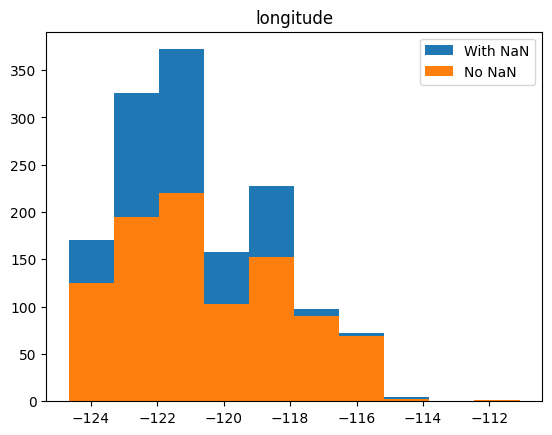

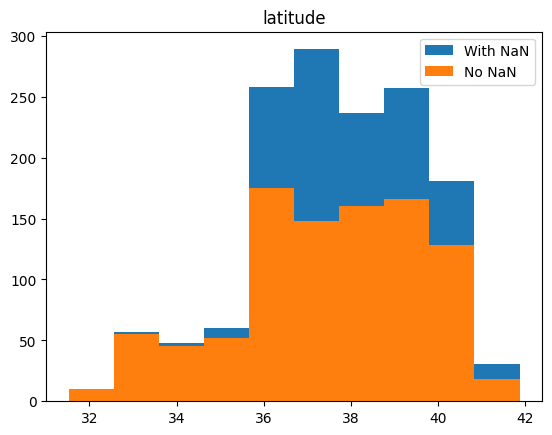

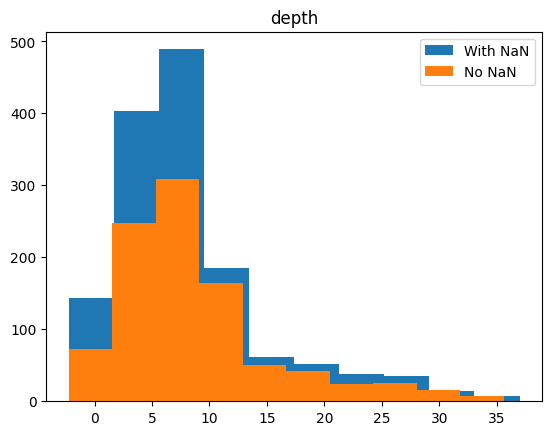

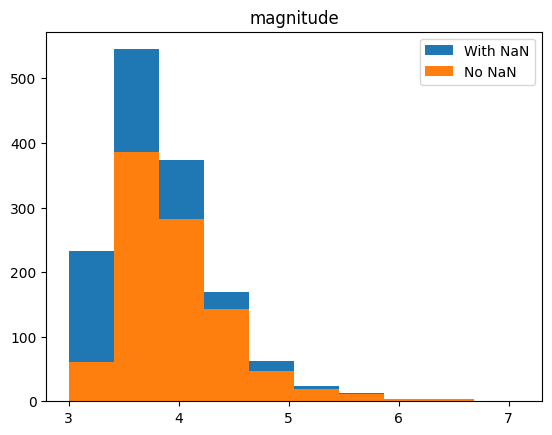

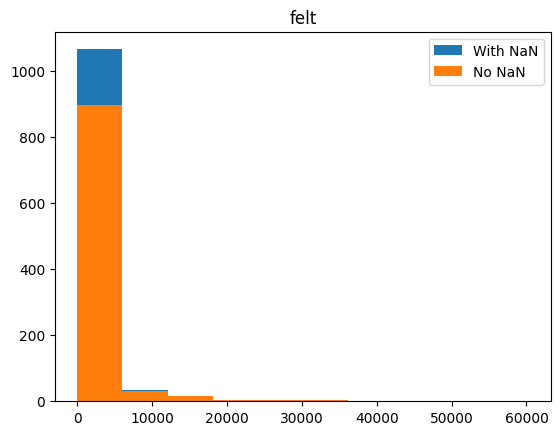

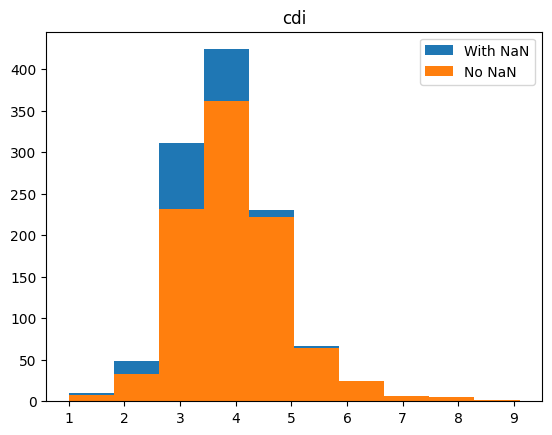

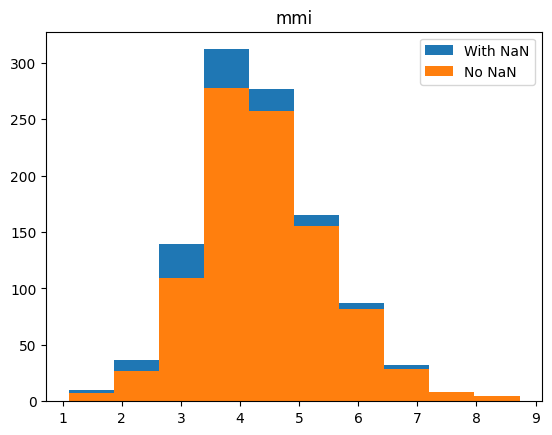

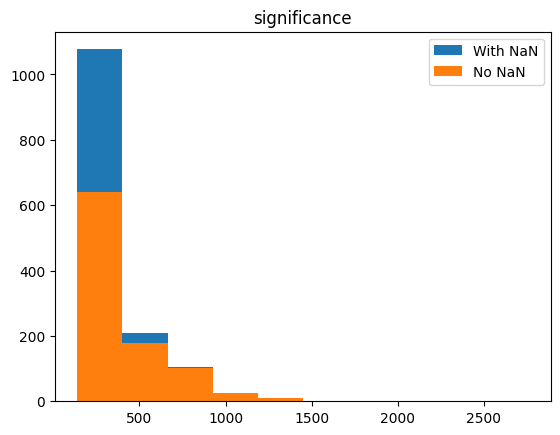

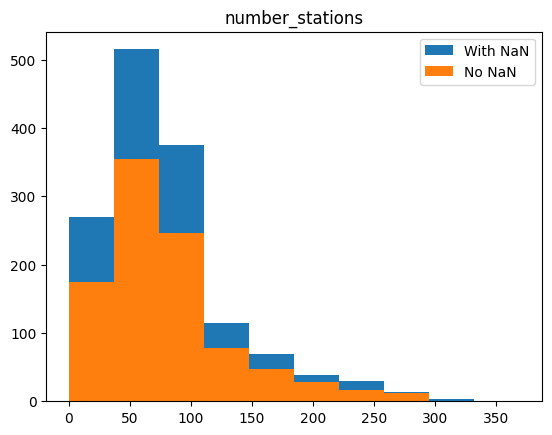

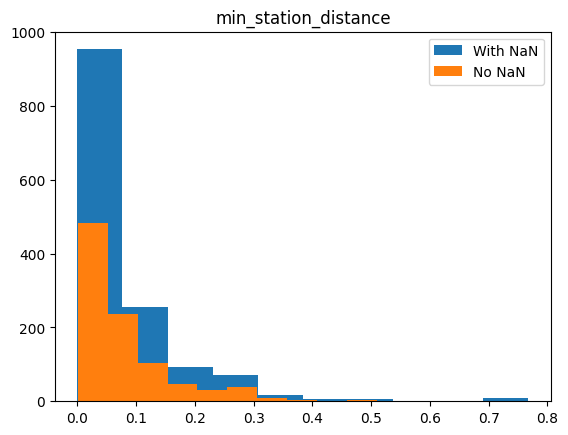

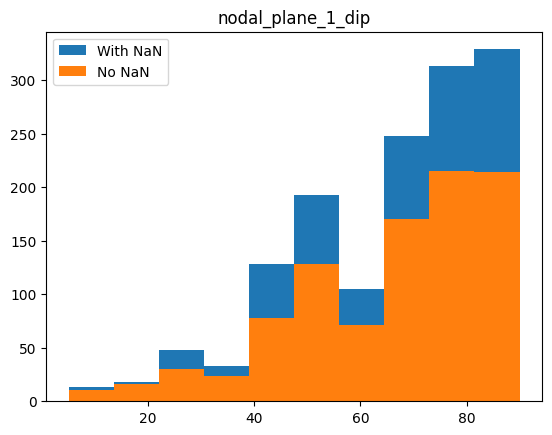

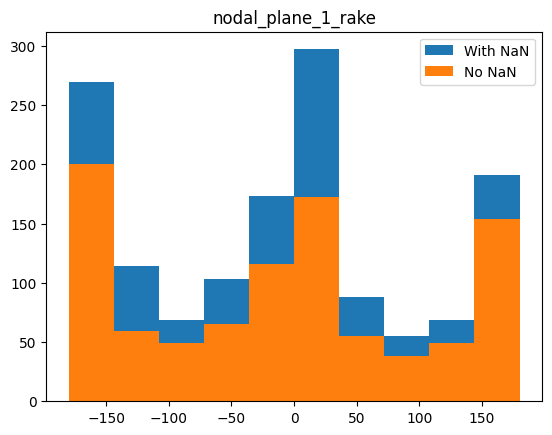

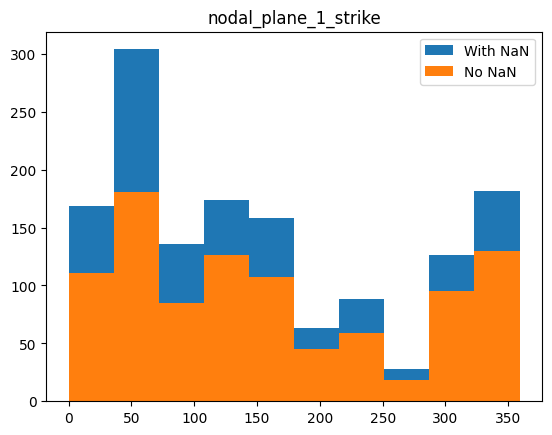

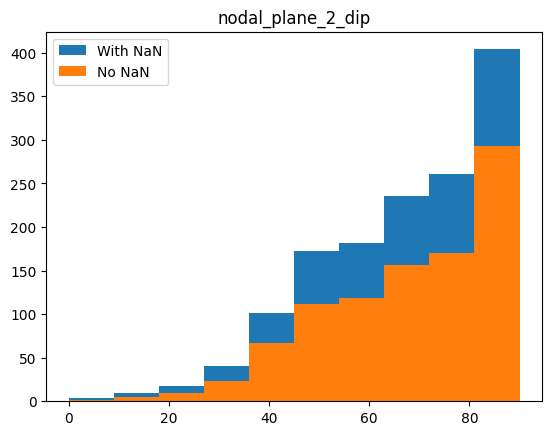

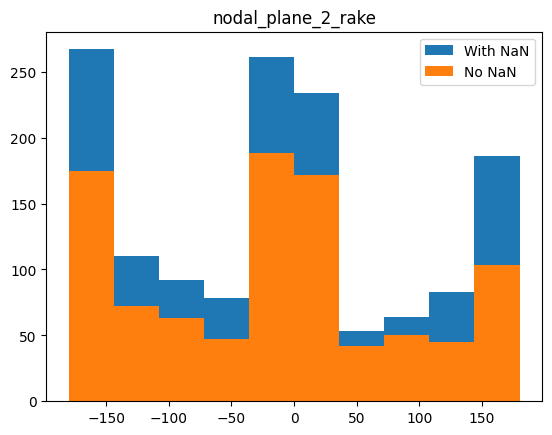

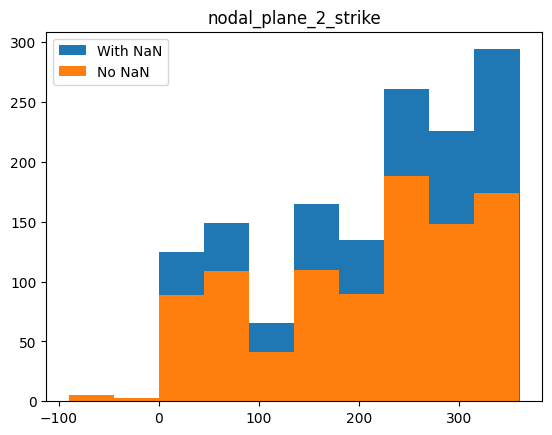

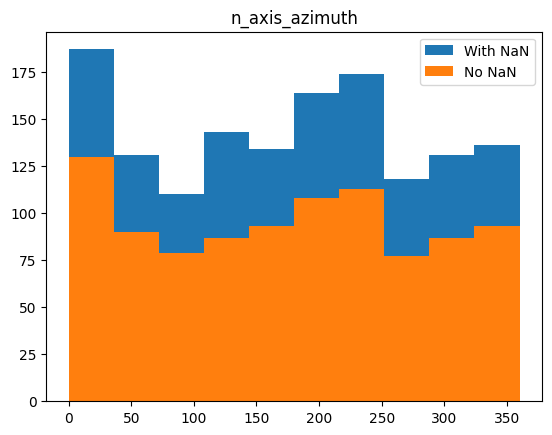

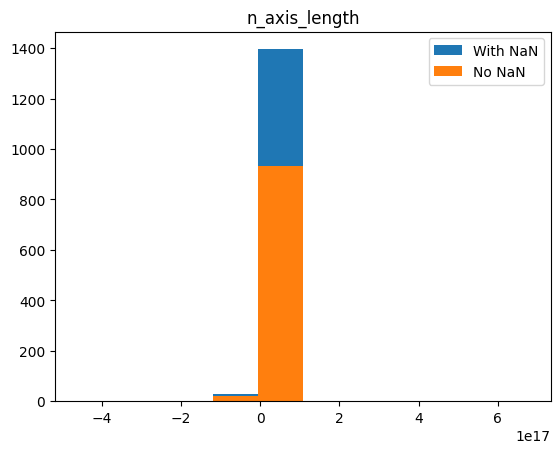

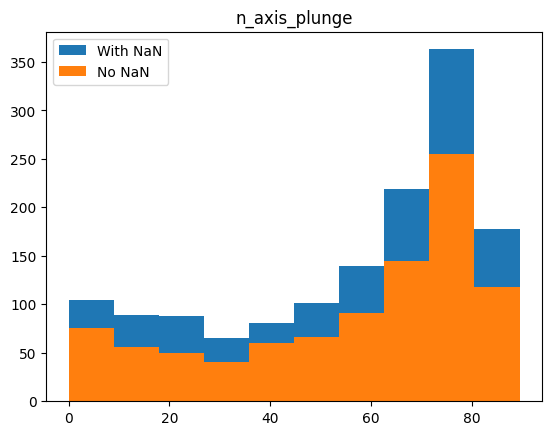

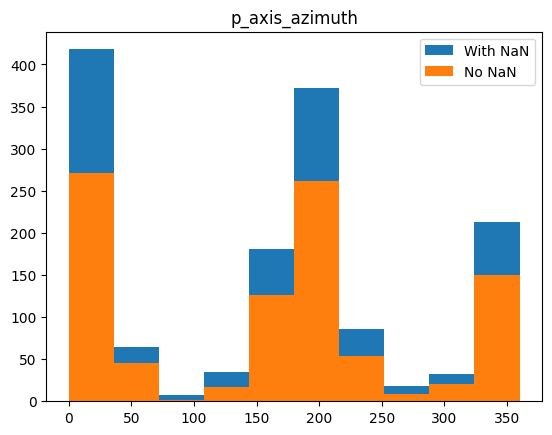

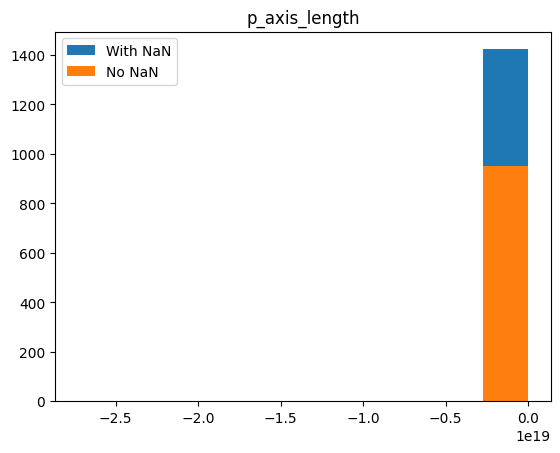

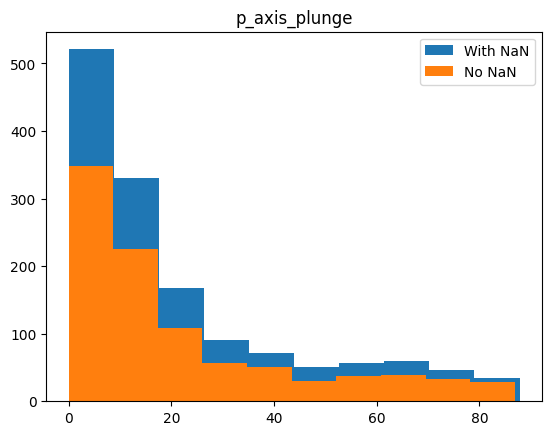

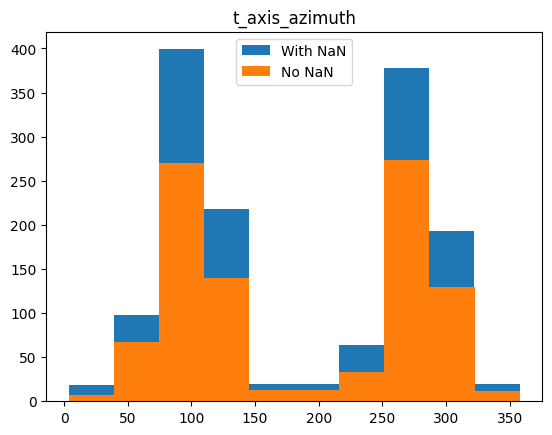

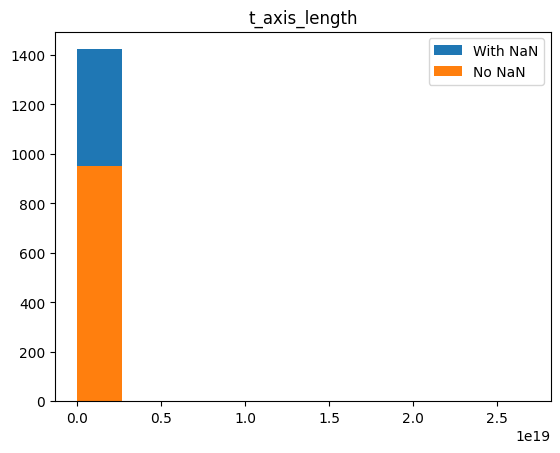

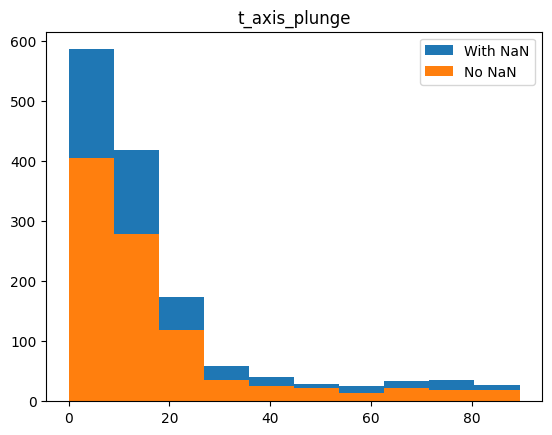

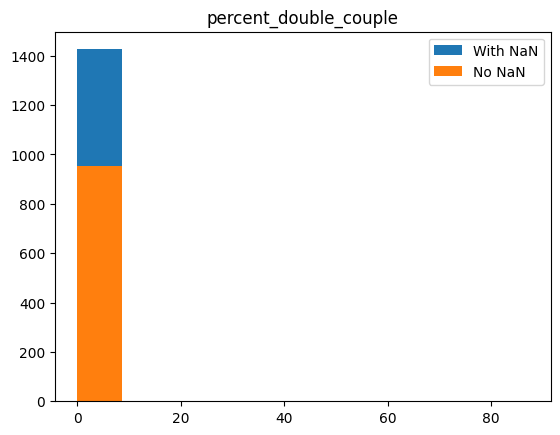

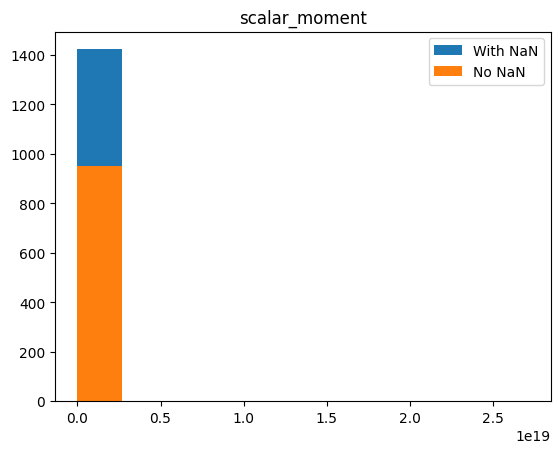

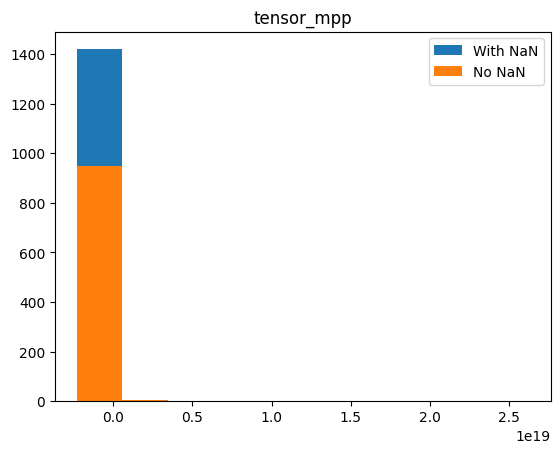

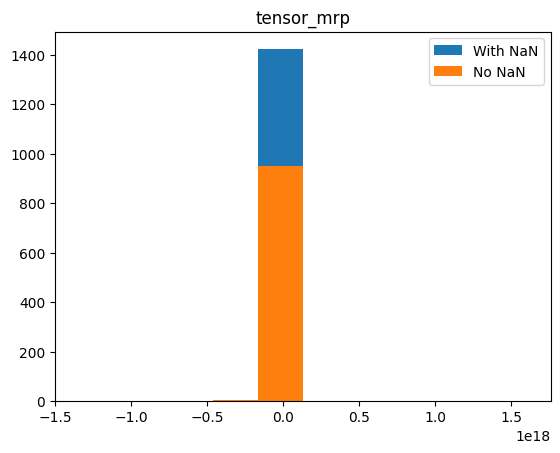

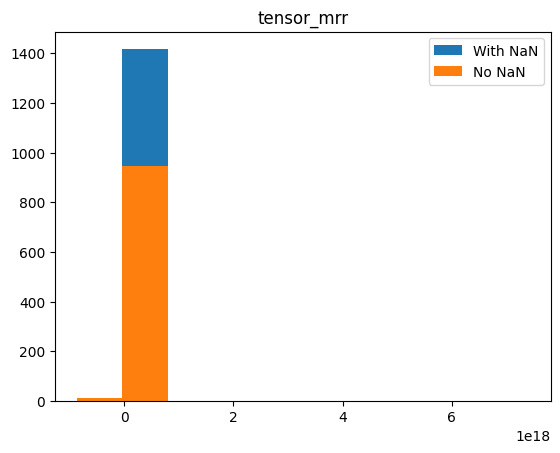

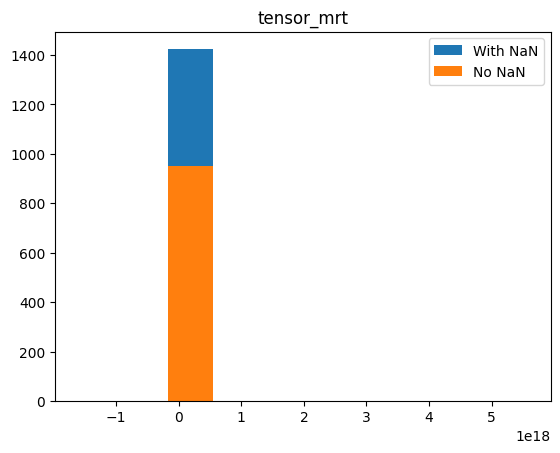

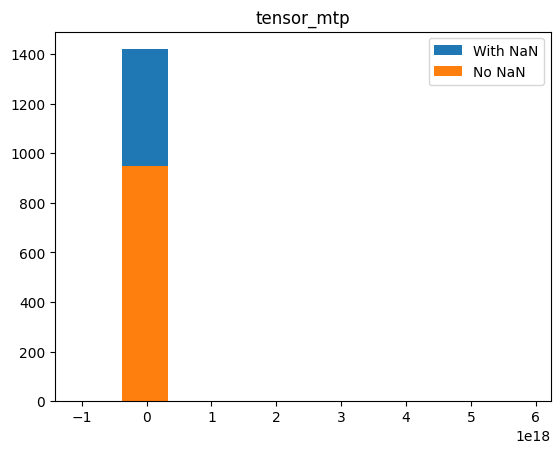

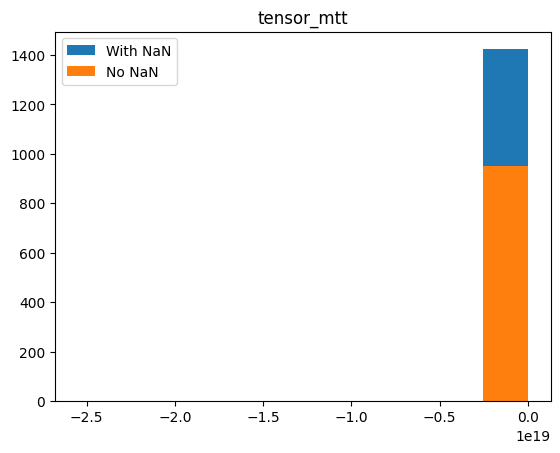

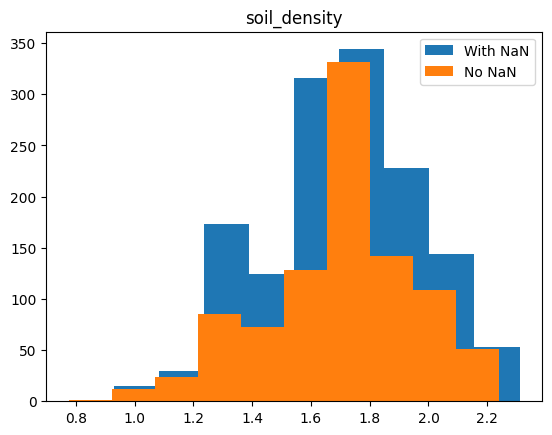

In [64]:
# Compare data distributions (histograms) of numerical measures before and after removal of rows with NaN
for col in df.describe().columns:
    plt.title(col)
    plt.hist(df[col], label='With NaN')
    plt.hist(df_cleaned[col], label='No NaN')
    plt.legend()

    plt.show()

As expected, the number of data points has decreased. However, the shape of the distributions is preserved.

**Conclusion:** It is safe to remove rows with `NaN` values.

## Exploratory Data Analysis

We are interested in predicting the intensity of an earthquake depending on its physical characteristics, such as depth, magnitude, tectonic variables, soil bulk density, etc.

One measure for the intensity of an earthquake is the Modified Mercalli Intensity (MMI) Scale (https://www.usgs.gov/programs/earthquake-hazards/modified-mercalli-intensity-scale). The MMI measure is recorded in the `mmi` column. Therefore, we will choose the `mmi` column as our target.

Let's explore the correlations between `mmi` and the other measures.

In [65]:
# Calculate correlations between mmi and other measures
df_cleaned.select_dtypes(include=['float64', 'int64']).corr()['mmi']

longitude                0.378112
latitude                -0.369560
depth                   -0.284634
magnitude                0.591884
felt                     0.333904
cdi                      0.513756
mmi                      1.000000
significance             0.523095
number_stations          0.113021
min_station_distance    -0.103125
nodal_plane_1_dip        0.081671
nodal_plane_1_rake      -0.018892
nodal_plane_1_strike     0.155440
nodal_plane_2_dip        0.167740
nodal_plane_2_rake       0.016988
nodal_plane_2_strike    -0.122845
n_axis_azimuth          -0.078624
n_axis_length            0.027745
n_axis_plunge            0.085742
p_axis_azimuth          -0.006436
p_axis_length           -0.214934
p_axis_plunge           -0.039784
t_axis_azimuth           0.013634
t_axis_length            0.217110
t_axis_plunge           -0.084429
percent_double_couple    0.016175
scalar_moment            0.216072
tensor_mpp               0.169550
tensor_mrp              -0.030556
tensor_mrr    

Notice that there are fairly strong correlations between `mmi` and the `felt`, `cdi`, and `significance` metrics. That is not surprising since the `felt`, `cdi`, and `significance` metrics measure different aspects of an earthquakes intensity or impact from the `mmi` metric.

In particular,
* `felt` contains the number of "Felt" reports submitted to the "Did You Feel It" system,
* `cdi` contains another measure for the intensity, and
* `significance` contains the significance of an earthquake which is determined by factors such as magnitude, maximum MMI, felt reports, and estimated impact.
Source: Various links on https://earthquake.usgs.gov/data/comcat/.

To avoid possible data leakage on the `mmi` measure, we will drop the columns `felt`, `cdi`, and `significance`.

We will also drop the columns `id`, `time`, and `place`. They are not needed to build our classification model since
* `id` is just an identifier for each earthquake.
* The classification model we are building does not depend on the time when an earthquake occurred. Hence, `time` is not relevant.
* `place` is covered by the numerical variables of `longitude` and `latitude`.

This leaves us with only numerical columns.

In [66]:
# Drop columns 'id', 'time', 'place', 'felt', 'cdi', and 'significance'
columns_to_drop = ['id', 'time', 'place', 'felt', 'cdi', 'significance']
df_numerical = df_cleaned.drop(columns=columns_to_drop)
df_numerical.head()

,longitude,latitude,depth,magnitude,mmi,number_stations,min_station_distance,nodal_plane_1_dip,nodal_plane_1_rake,nodal_plane_1_strike,...,t_axis_plunge,percent_double_couple,scalar_moment,tensor_mpp,tensor_mrp,tensor_mrr,tensor_mrt,tensor_mtp,tensor_mtt,soil_density
0,-122.686500,37.907333,7.659,4.60,5.38,71.0,0.02883,80.0,90.0,140.0,...,80.769,0.48,9.756000e+15,-2.216000e+15,-1.915000e+15,7.806000e+15,2.421000e+15,6.588000e+15,-5.590000e+15,1.220000
1,-124.460167,40.466000,28.026,4.10,2.86,37.0,0.09459,60.0,-170.0,145.0,...,32.902,0.96,1.474000e+15,9.714000e+14,-7.529000e+14,1.047000e+14,-7.374000e+14,8.916000e+13,-1.076000e+15,1.856667
2,-121.693500,40.988500,17.109,4.40,3.53,60.0,0.24320,50.0,-100.0,140.0,...,6.658,0.84,4.943000e+15,3.524000e+15,1.649000e+15,-4.008000e+15,8.137000e+14,-2.609000e+15,4.844000e+14,1.630000
3,-122.766833,38.782333,3.461,4.37,3.58,58.0,0.03333,55.0,-10.0,230.0,...,11.860,0.45,4.482000e+15,4.383000e+15,-1.630000e+15,-1.694000e+15,6.186000e+14,1.983000e+15,-2.690000e+15,2.057500
4,-120.473500,39.357833,4.839,4.40,4.82,182.0,0.20540,55.0,-170.0,335.0,...,14.670,0.99,5.534000e+15,3.222000e+15,3.054000e+14,-9.109000e+14,2.807000e+15,3.791000e+15,-2.311000e+15,1.660000


Since we are looking to build a classification model, we have to divide the earthquake records into different classes depending on the MMI value (since that is our chosen target).

According to https://www.usgs.gov/programs/earthquake-hazards/modified-mercalli-intensity-scale, an MMI value larger than 4 is felt by many people but does not cause any property damage. An MMI value larger than 5 is felt by almost anyone with property damage starting to occur. Therefore, it seems reasonable to use `mmi=4` and `mmi=5` as values to distinguish three classes of earthquakes, one with `mmi<4` (weak), a second with `4<=mmi<5` (moderate), and a third with `mmi>=5` (strong and above).

In [67]:
# Add a column for the 'mmi' class
df_numerical['mmi_class'] = [0 if mmi<4 else 1 if mmi>=4 and mmi<5 else 2 for mmi in df_cleaned['mmi']]

In [68]:
# Check how many records there are in each class
display(df_numerical['mmi_class'].value_counts())

mmi_class
1    353
0    352
2    252
Name: count, dtype: int64

Each class contains a similar number of records. Hence, we do not have to worry about imbalanced classes.

However, since we derived our classes from the `mmi` values, we have to drop the `mmi` column to prevent data leakage.

In [69]:
# Drop the 'mmi' column so there is no data leakage
df_final = df_numerical.drop(columns='mmi')

df_final.head()

,longitude,latitude,depth,magnitude,number_stations,min_station_distance,nodal_plane_1_dip,nodal_plane_1_rake,nodal_plane_1_strike,nodal_plane_2_dip,...,percent_double_couple,scalar_moment,tensor_mpp,tensor_mrp,tensor_mrr,tensor_mrt,tensor_mtp,tensor_mtt,soil_density,mmi_class
0,-122.686500,37.907333,7.659,4.60,71.0,0.02883,80.0,90.0,140.0,10.0,...,0.48,9.756000e+15,-2.216000e+15,-1.915000e+15,7.806000e+15,2.421000e+15,6.588000e+15,-5.590000e+15,1.220000,2
1,-124.460167,40.466000,28.026,4.10,37.0,0.09459,60.0,-170.0,145.0,81.0,...,0.96,1.474000e+15,9.714000e+14,-7.529000e+14,1.047000e+14,-7.374000e+14,8.916000e+13,-1.076000e+15,1.856667,0
2,-121.693500,40.988500,17.109,4.40,60.0,0.24320,50.0,-100.0,140.0,41.0,...,0.84,4.943000e+15,3.524000e+15,1.649000e+15,-4.008000e+15,8.137000e+14,-2.609000e+15,4.844000e+14,1.630000,0
3,-122.766833,38.782333,3.461,4.37,58.0,0.03333,55.0,-10.0,230.0,82.0,...,0.45,4.482000e+15,4.383000e+15,-1.630000e+15,-1.694000e+15,6.186000e+14,1.983000e+15,-2.690000e+15,2.057500,0
4,-120.473500,39.357833,4.839,4.40,182.0,0.20540,55.0,-170.0,335.0,82.0,...,0.99,5.534000e+15,3.222000e+15,3.054000e+14,-9.109000e+14,2.807000e+15,3.791000e+15,-2.311000e+15,1.660000,1


## Data Scaling

Since the data has vastly different scales we need to scale it. Since none of the distributions of our data is bounded, it seems that the Standard Scaler will introduce less of a distortion than the `MinMaxScaler`. Hence, we will apply the Standard Scaler. 

In [70]:
# First define X ...
X = df_final.drop(columns='mmi_class', axis=1)
display(X.head())

,longitude,latitude,depth,magnitude,number_stations,min_station_distance,nodal_plane_1_dip,nodal_plane_1_rake,nodal_plane_1_strike,nodal_plane_2_dip,...,t_axis_plunge,percent_double_couple,scalar_moment,tensor_mpp,tensor_mrp,tensor_mrr,tensor_mrt,tensor_mtp,tensor_mtt,soil_density
0,-122.686500,37.907333,7.659,4.60,71.0,0.02883,80.0,90.0,140.0,10.0,...,80.769,0.48,9.756000e+15,-2.216000e+15,-1.915000e+15,7.806000e+15,2.421000e+15,6.588000e+15,-5.590000e+15,1.220000
1,-124.460167,40.466000,28.026,4.10,37.0,0.09459,60.0,-170.0,145.0,81.0,...,32.902,0.96,1.474000e+15,9.714000e+14,-7.529000e+14,1.047000e+14,-7.374000e+14,8.916000e+13,-1.076000e+15,1.856667
2,-121.693500,40.988500,17.109,4.40,60.0,0.24320,50.0,-100.0,140.0,41.0,...,6.658,0.84,4.943000e+15,3.524000e+15,1.649000e+15,-4.008000e+15,8.137000e+14,-2.609000e+15,4.844000e+14,1.630000
3,-122.766833,38.782333,3.461,4.37,58.0,0.03333,55.0,-10.0,230.0,82.0,...,11.860,0.45,4.482000e+15,4.383000e+15,-1.630000e+15,-1.694000e+15,6.186000e+14,1.983000e+15,-2.690000e+15,2.057500
4,-120.473500,39.357833,4.839,4.40,182.0,0.20540,55.0,-170.0,335.0,82.0,...,14.670,0.99,5.534000e+15,3.222000e+15,3.054000e+14,-9.109000e+14,2.807000e+15,3.791000e+15,-2.311000e+15,1.660000


In [71]:
# ... then y
y = df_final['mmi_class']
#y = df_final['mmi_class'].values.reshape(-1, 1)
y[:5]

0    2
1    0
2    0
3    0
4    1
Name: mmi_class, dtype: int64

In [72]:
# Split into train and test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=13)

In [73]:
# Instantiate Standard Scaler
scaler = StandardScaler()

# Fit to X_train
scaler.fit(X_train)

# Scale (transform) X_train and X_test
X_train_scaled = scaler.transform(X_train)
print('Scaled train dataset:')
display(X_train_scaled)
X_test_scaled = scaler.transform(X_test)
print('Scaled test dataset:')
display(X_test_scaled)

Scaled train dataset:


array([[ 1.11430912, -0.62811811, -0.95447817, ..., -0.06274409,
         0.06089167,  0.86482846],
       [-0.86569468,  0.56203871, -0.28872689, ..., -0.06504792,
         0.06064911, -0.5816665 ],
       [-0.26640835, -0.27325227, -0.01513048, ..., -0.06516526,
         0.06085578, -0.41616364],
       ...,
       [-0.26934839, -0.39776518, -0.22944767, ..., -0.06519217,
         0.06058791,  0.28292042],
       [ 0.72984965,  0.08056727, -0.38706961, ..., -0.06631744,
         0.06062087, -1.34297964],
       [-0.3717706 , -0.76880884,  0.11467582, ..., -0.06252106,
         0.06016993, -1.77328706]])

Scaled test dataset:


array([[-0.8959838 ,  0.64284734, -0.88303911, ..., -0.06190703,
         0.06050952,  1.4407784 ],
       [-0.89236002,  0.64928631, -1.11468407, ..., -0.06433405,
         0.06086202,  1.4407784 ],
       [-1.53690908,  1.35990337,  1.27381263, ..., -0.06035863,
         0.05858444,  0.19288687],
       ...,
       [ 0.84286965,  0.21900441, -0.13520891, ..., -0.06381215,
         0.06003114,  2.09285965],
       [ 1.51107563, -1.96814115,  0.66734058, ..., -0.0654811 ,
         0.05883971,  0.38959883],
       [ 2.05217684, -2.12605605,  0.85429813, ...,  0.01869618,
         0.04804904,  2.16568091]])

## Preliminary Model

Build a preliminary model using a Random Forest Classifier to see how well it performs.

In [74]:
# Instantiate a Random Forest Classifier model
rfc = RandomForestClassifier(random_state=42)

# Fit the model to the train data
rfc.fit(X_train_scaled, y_train)

# Evaluate the model
print(f'Training Score: {rfc.score(X_train_scaled, y_train)}')
print(f'Testing Score: {rfc.score(X_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 0.6583333333333333


Promising, but overfit.

In [75]:
# Check balanced accuracy scores
# First, make prediction
y_train_predict = rfc.predict(X_train_scaled)
print(f"Balanced Training Accuracy Score: {balanced_accuracy_score(y_train, y_train_predict):.3f}")

y_test_predict = rfc.predict(X_test_scaled)
print(f"Balanced Testing Accuracy Score: {balanced_accuracy_score(y_test, y_test_predict):.3f}")

Balanced Training Accuracy Score: 1.000
Balanced Testing Accuracy Score: 0.658


In [76]:
# Calculate the classification report
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.68      0.82      0.74        79
           1       0.66      0.58      0.62        96
           2       0.63      0.57      0.60        65

    accuracy                           0.66       240
   macro avg       0.65      0.66      0.65       240
weighted avg       0.66      0.66      0.65       240



In [77]:
# Get the feature importance array
feature_importances = rfc.feature_importances_

# List the top 10 most important features
importances_sorted = sorted(zip(feature_importances, X.columns), reverse=True)
importances_sorted

[(0.06513043230333693, 'latitude'),
 (0.062395971330096806, 'depth'),
 (0.06072291858558487, 'longitude'),
 (0.052247312810460425, 'p_axis_length'),
 (0.046808604921579455, 'tensor_mpp'),
 (0.042918095221464225, 't_axis_length'),
 (0.038894557998285596, 'min_station_distance'),
 (0.03771611628422438, 'scalar_moment'),
 (0.03771475335178566, 'tensor_mtt'),
 (0.03597363534499345, 'magnitude'),
 (0.0336186808351858, 'tensor_mtp'),
 (0.032415926254426054, 'n_axis_length'),
 (0.03111133244680168, 'soil_density'),
 (0.02962267148653566, 'p_axis_azimuth'),
 (0.029467920182748818, 'nodal_plane_2_rake'),
 (0.027983267560508056, 'number_stations'),
 (0.026921387310880625, 'n_axis_plunge'),
 (0.026881234976535884, 'tensor_mrp'),
 (0.026379536732045055, 'tensor_mrr'),
 (0.02586439993872692, 'nodal_plane_2_strike'),
 (0.02581233084246933, 'tensor_mrt'),
 (0.02536024819545633, 'n_axis_azimuth'),
 (0.024289906603772015, 't_axis_plunge'),
 (0.024244217763691588, 'p_axis_plunge'),
 (0.02412679958881261

None of the features seem to be too dominant over any other feature.

## Export the Standardized Data for Further Analysis

In [78]:
# Scale X
X_scaled = scaler.transform(X)
display(X_scaled)

array([[-0.85878906,  0.21739465, -0.13840086, ..., -0.04247112,
         0.05525488, -1.88582901],
       [-1.5864109 ,  1.45302647,  2.95734257, ..., -0.064978  ,
         0.05979145,  0.64305463],
       [-0.45142476,  1.70535227,  1.29798031, ..., -0.07432231,
         0.06135965, -0.2572809 ],
       ...,
       [-1.41007779,  1.68619642,  2.07180217, ..., -0.06473094,
         0.06091534, -1.20395724],
       [-1.38573713,  1.42550001,  3.35314538, ..., -0.25185018,
        -0.04987805, -0.72825474],
       [-0.25157147, -0.4163576 , -0.12608903, ..., -0.06509946,
         0.06000682, -0.01895679]])

In [79]:
# Construct a DataFrame from scaled X and original y.
df_standard = pd.DataFrame(X_scaled, columns=X.columns)
df_standard['mmi_class'] = y

display(df_standard.head())

,longitude,latitude,depth,magnitude,number_stations,min_station_distance,nodal_plane_1_dip,nodal_plane_1_rake,nodal_plane_1_strike,nodal_plane_2_dip,...,percent_double_couple,scalar_moment,tensor_mpp,tensor_mrp,tensor_mrr,tensor_mrt,tensor_mtp,tensor_mtt,soil_density,mmi_class
0,-0.858789,0.217395,-0.138401,1.259068,-0.162005,-0.621166,0.764993,0.856091,-0.187953,-3.275980,...,-0.131701,-0.058242,-0.053888,-0.019118,-0.003759,-0.020843,-0.042471,0.055255,-1.885829,2
1,-1.586411,1.453026,2.957343,0.278647,-0.799719,0.182939,-0.322804,-1.396320,-0.143028,0.718901,...,-0.016844,-0.065891,-0.050703,-0.004675,-0.031174,-0.034918,-0.064978,0.059791,0.643055,0
2,-0.451425,1.705352,1.297980,0.866900,-0.368324,2.000126,-0.866703,-0.789901,-0.187953,-1.531736,...,-0.045558,-0.062687,-0.048152,0.025176,-0.045815,-0.028006,-0.074322,0.061360,-0.257281,0
3,-0.891745,0.639950,-0.776489,0.808074,-0.405837,-0.566141,-0.594754,-0.010221,0.620696,0.775167,...,-0.138879,-0.063113,-0.047294,-0.015576,-0.037577,-0.028875,-0.058419,0.058169,1.440778,0
4,0.049063,0.917870,-0.567035,0.866900,1.919944,1.537912,-0.594754,-1.396320,1.564120,0.775167,...,-0.009665,-0.062141,-0.048454,0.008477,-0.034790,-0.019123,-0.052158,0.058550,-0.138119,1


In [80]:
# Export DataFrame with standardized data to a .csv file
df_standard.to_csv('../Resources/earthquake_data_standardized.csv', index=False)